In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Approximation au sens des moindres carrés

## 1. Importation d'un nuage de points

In [3]:
import os
os.getcwd()

'H:\\Enseignement\\Formations_Python\\Ecole_doctorale\\ED-SPI-Python-juin19\\19-06-14_Vendredi\\2-Apres_midi'

In [4]:
from outils_fichiers5 import array_from_file
T = array_from_file("data1.txt")

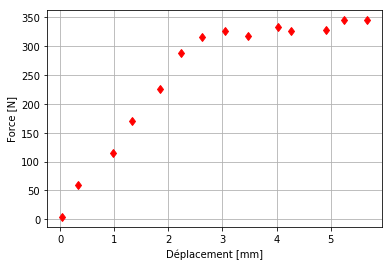

In [5]:
def nuage() :
    ax = plt.subplot(1,1,1)
    ax.plot(1e3*T[:,2],T[:,1],"dr")
    ax.set_xlabel("Déplacement [mm]")
    ax.set_ylabel("Force [N]")
    ax.grid()
    return ax
ax = nuage()

## 2. Approximation polynomiale

In [6]:
np.info(np.polyfit)

 polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

Least squares polynomial fit.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    points sharing the same x-coordinates can be fitted at once by
    passing in a 2D-array that contains one dataset per column.
deg : int
    Degree of the fitting polynomial
rcond : float, optional
    Relative condition number of the fit. Singular values smaller than
    this relative to the largest singular value will be ignored. The
    default value is len(x)*eps, where eps is the relative precision of
    the float type, about 2e-16 in most cases.
full : bool, optional
    Switch determining nature of return valu

array([56640.48655751,    88.29625021])

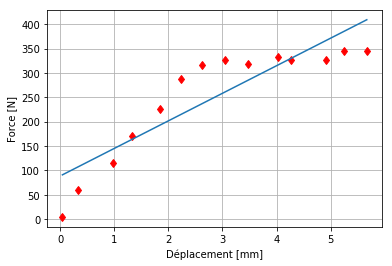

In [7]:
C = np.polyfit(T[:,2],T[:,1],1)
ax = nuage()
X = np.linspace(T[:,2].min(),T[:,2].max(),300)
ax.plot(X*1e3,np.polyval(C,X))
C

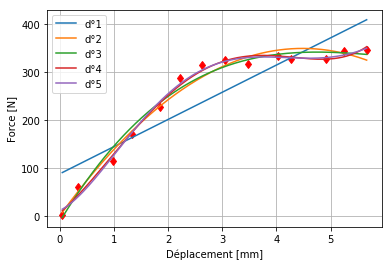

In [8]:
ax = nuage()
X = np.linspace(T[:,2].min(),T[:,2].max(),300)
for deg in range(1,6) :
    C = np.polyfit(T[:,2],T[:,1],deg)
    ax.plot(X*1e3,np.polyval(C,X),label=f"d°{deg}")
plt.legend();

## 3. Approximation générale

In [9]:
from numpy.linalg import solve
def approx_MC(X,Y,base) :
    """X et Y sont des vecteurs. 
    base est une liste de fonctions vectorisées."""
    Ft = np.array([ f(X) for f in base ]) # transposée de la matrice F
    F = Ft.transpose()
    M = Ft.dot(F) # ou np.dot(Ft,F) and Ft@F
    B = Ft.dot(Y)
    # Vecteur a solution de M a = B
    a = solve(M,B)
    return a

In [10]:
np.polyfit(T[:,2],T[:,1],1)

array([56640.48655751,    88.29625021])

In [11]:
# def f0(x) : return 1 # fonction non vectorisée
f0 = np.ones_like
def f1(x) : return x
approx_MC(T[:,2],T[:,1],[f1,f0])

array([56640.48655751,    88.29625021])

In [12]:
from numpy.linalg import solve
def approx_MC_plus(X,Y,base) :
    """X et Y sont des vecteurs. 
    base est une liste de fonctions vectorisées."""
    Ft = np.array([ f(X) for f in base ]) # transposée de la matrice F
    F = Ft.transpose()
    M = Ft.dot(F) # ou np.dot(Ft,F) and Ft@F
    B = Ft.dot(Y)
    # Vecteur a solution de M a = B
    a = solve(M,B)
    # calcul de l'erreur
    err = np.sqrt(Y.dot(Y-F.dot(a)))
    # Définition de la fonction d'approximation
    def f_app(v,a=a,base=base) : # Passage de TOUS les paramètres
        return a.dot([ f(v) for f in base ])
    return a,err,f_app

In [13]:
C,err,g = approx_MC_plus(T[:,2],T[:,1],[f1,f0])

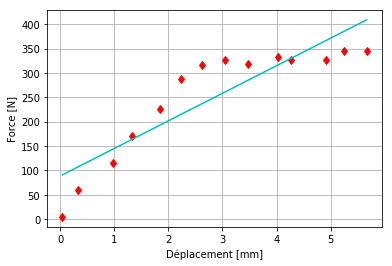

In [14]:
ax = nuage()
plt.plot(X*1e3,g(X),"c");

In [15]:
def r(t) : return (t>0)*t
def f2(t) : return r(t-2.8e-3)
C,err,h = approx_MC_plus(T[:,2],T[:,1],[r,f2])

In [16]:
C

array([ 119767.49567358, -119376.74846122])

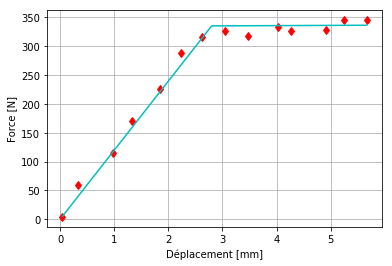

In [17]:
ax = nuage()
plt.plot(X*1e3,h(X),"c");